In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

>#  ***Exploratory Data Analysis (EDA)***

In [3]:
import pandas as pd
df = pd.read_csv('Sleep_Efficiency.csv')

In [4]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [5]:
print(df.columns)

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

# **Summary Statistics**

In [7]:
print(df.describe())

               ID         Age  Sleep duration  Sleep efficiency  \
count  452.000000  452.000000      452.000000        452.000000   
mean   226.500000   40.285398        7.465708          0.788916   
std    130.625419   13.172250        0.866625          0.135237   
min      1.000000    9.000000        5.000000          0.500000   
25%    113.750000   29.000000        7.000000          0.697500   
50%    226.500000   40.000000        7.500000          0.820000   
75%    339.250000   52.000000        8.000000          0.900000   
max    452.000000   69.000000       10.000000          0.990000   

       REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
count            452.000000             452.000000              452.000000   
mean              22.615044              52.823009               24.561947   
std                3.525963              15.654235               15.313665   
min               15.000000              18.000000                7.000000   
25%   

# **Missing Value Analysis**

In [8]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Awakenings              20
Caffeine consumption    25
Alcohol consumption     14
Exercise frequency       6
dtype: int64


# **Data Types and Unique Counts**

In [9]:
print(df.dtypes)
print(df.nunique())

ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object
ID                        452
Age                        61
Gender                      2
Bedtime                   424
Wakeup time               434
Sleep duration              9
Sleep efficiency           50
REM sleep percentage       13
Deep sleep percentage      29
Light sleep percentage     29
Awakenings                  5
Caffeine consumption        6
Alcohol consumption         6
Smoking status              2
Exercise frequency          6
dtype: int64


# **Correlation Analysis**

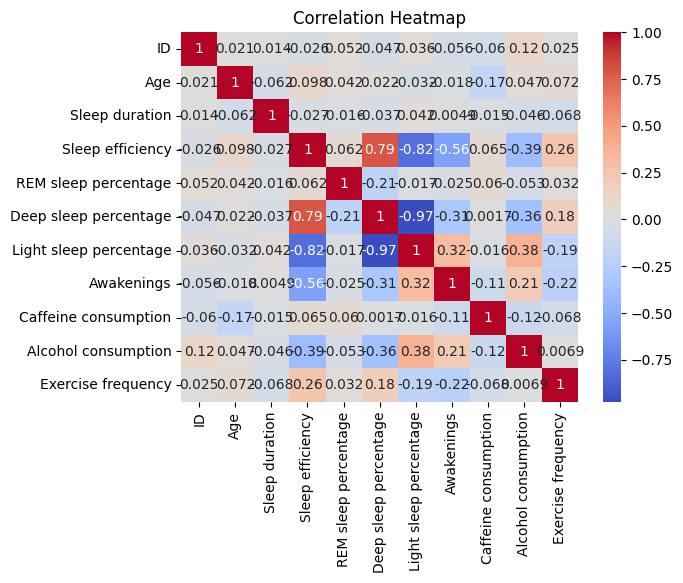

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



# **Histogram for Feature Distribution**

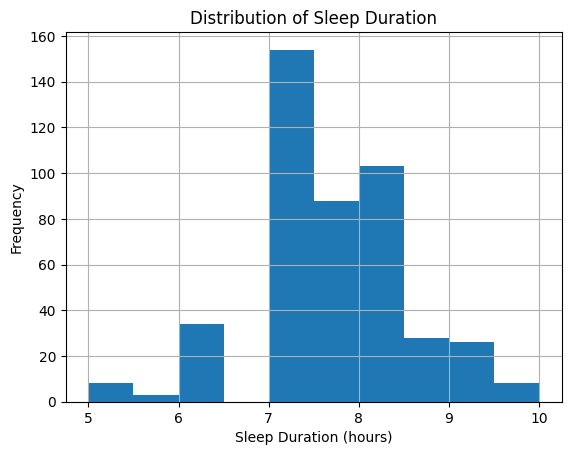

In [11]:
df['Sleep duration'].hist(bins=10)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()


# **Box Plots for Outlier Detection**

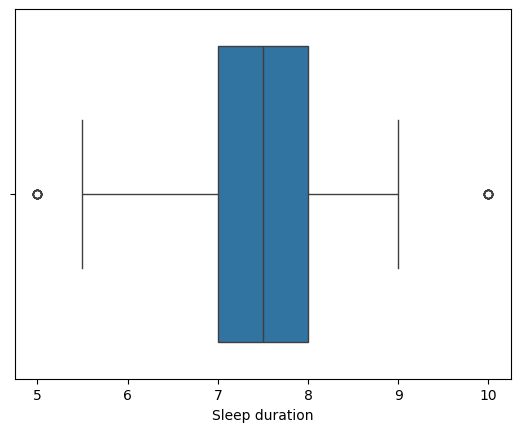

In [12]:
sns.boxplot(data=df, x='Sleep duration')
plt.show()


# **Pairwise Relationships (Pairplot)**

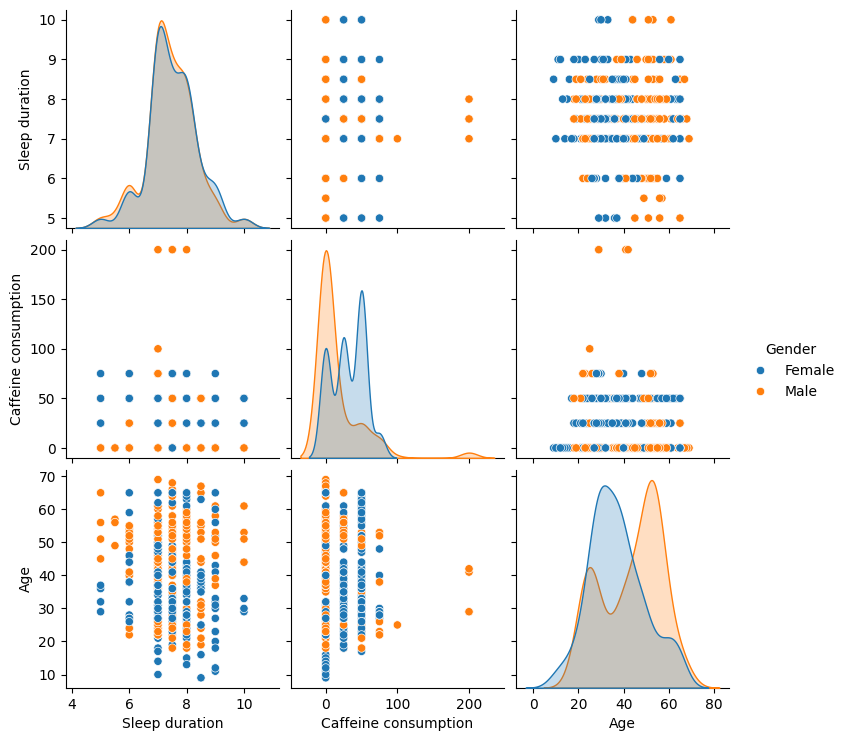

In [13]:
sns.pairplot(df, vars=['Sleep duration', 'Caffeine consumption', 'Age'], hue='Gender')
plt.show()


# **Trend Analysis**

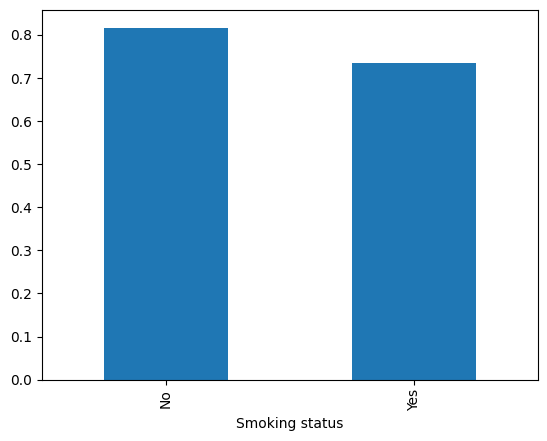

In [14]:
df.groupby('Smoking status')['Sleep efficiency'].mean().plot(kind='bar')
plt.show()


# **Scatter Plot Analysis**

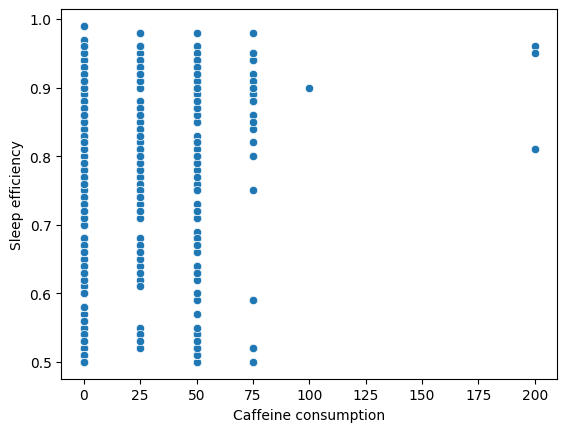

In [15]:
sns.scatterplot(data=df, x='Caffeine consumption', y='Sleep efficiency')
plt.show()


# **Feature Distribution by Categories**

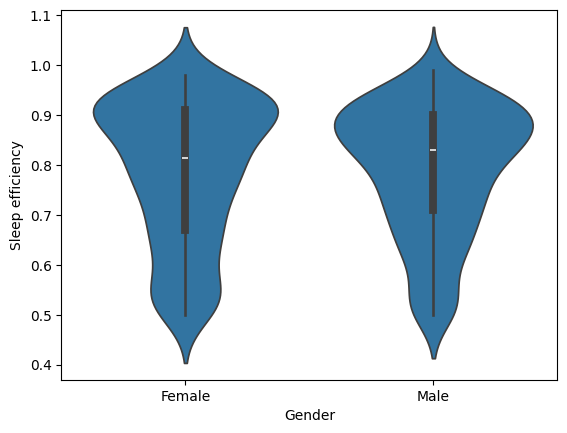

In [16]:
sns.violinplot(data=df, x='Gender', y='Sleep efficiency')
plt.show()


# **Correlation of Binary Categories with Target**

In [17]:
gender_corr = df.groupby('Gender')['Sleep efficiency'].mean()
print(gender_corr)


Gender
Female    0.787545
Male      0.790263
Name: Sleep efficiency, dtype: float64


# **Stacked Bar Charts for Categorical Data**

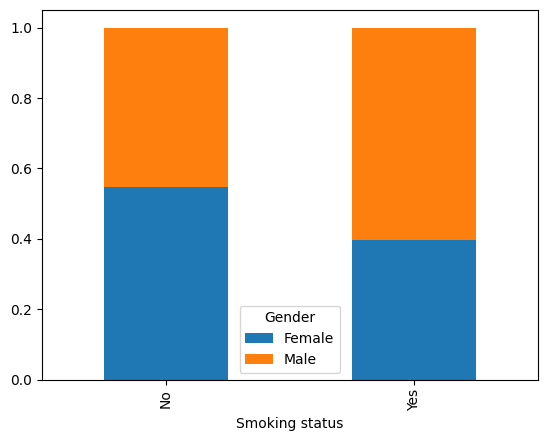

In [18]:
pd.crosstab(df['Smoking status'], df['Gender'], normalize='index').plot.bar(stacked=True)
plt.show()


# **Distribution of Target Variable**

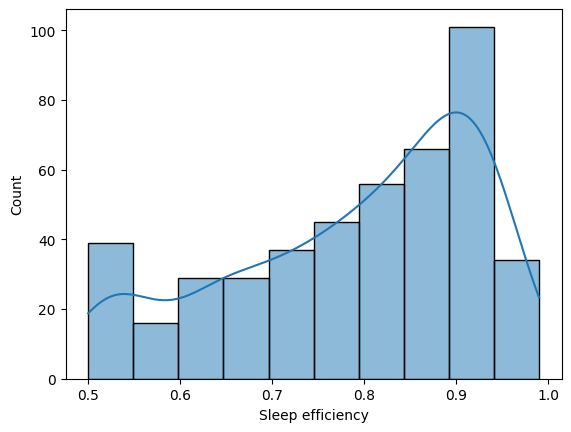

In [19]:
sns.histplot(df['Sleep efficiency'], kde=True)
plt.show()


# **Insights Based on Aggregations**

In [20]:
df.groupby('Smoking status')[['Sleep efficiency', 'Caffeine consumption']].mean()


,Sleep efficiency,Caffeine consumption
Smoking status,,
No,0.817081,23.492908
Yes,0.734416,23.965517


# **Day vs Night Sleep Proportion**

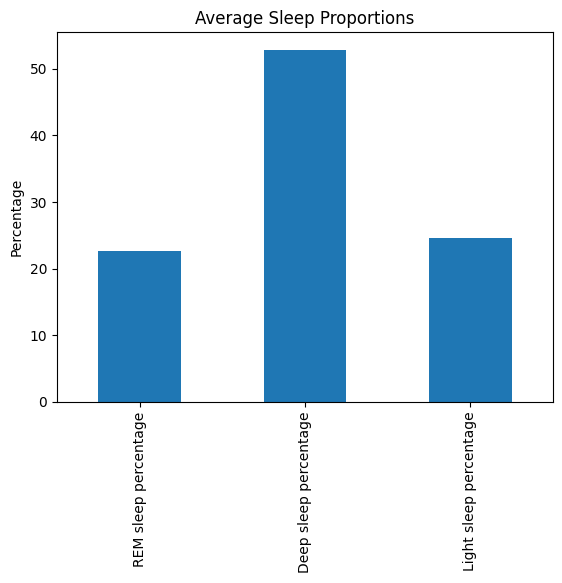

In [21]:
proportions = df[['REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage']].mean()
proportions.plot(kind='bar')
plt.title('Average Sleep Proportions')
plt.ylabel('Percentage')
plt.show()


# **Age Group Analysis**

C:\Users\Noor\AppData\Local\Temp\ipykernel_8868\1780999915.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_efficiency = df.groupby('age_group')['Sleep efficiency'].mean()


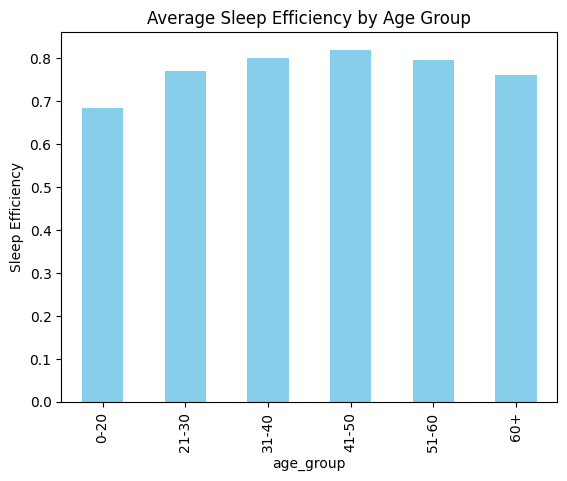

In [22]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
age_efficiency = df.groupby('age_group')['Sleep efficiency'].mean()
age_efficiency.plot(kind='bar', color='skyblue')
plt.title('Average Sleep Efficiency by Age Group')
plt.ylabel('Sleep Efficiency')
plt.show()


# **Gender-Specific Analysis**

        Sleep efficiency  Awakenings
Gender                              
Female          0.787545    1.537383
Male            0.790263    1.743119


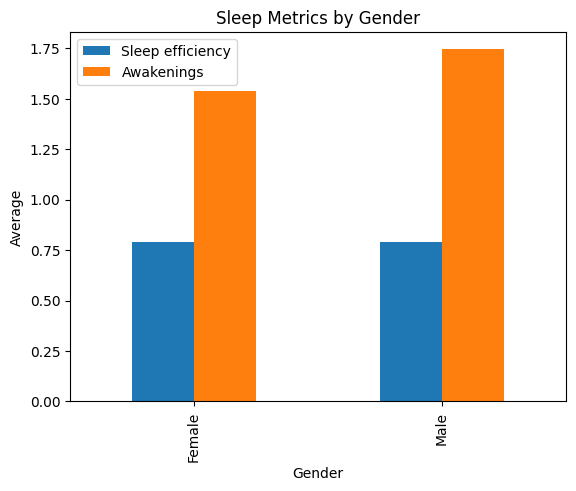

In [23]:
gender_analysis = df.groupby('Gender')[['Sleep efficiency', 'Awakenings']].mean()
print(gender_analysis)
gender_analysis.plot(kind='bar')
plt.title('Sleep Metrics by Gender')
plt.ylabel('Average')
plt.show()


# **Impact of Caffeine Consumption on Sleep Efficiency**

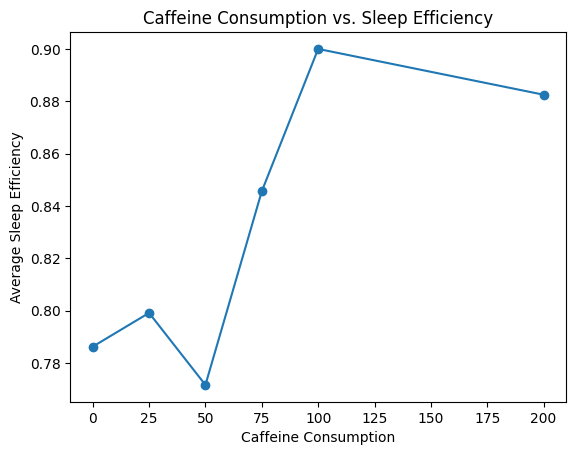

In [24]:
caffeine_analysis = df.groupby('Caffeine consumption')['Sleep efficiency'].mean()
caffeine_analysis.plot(kind='line', marker='o')
plt.title('Caffeine Consumption vs. Sleep Efficiency')
plt.xlabel('Caffeine Consumption')
plt.ylabel('Average Sleep Efficiency')
plt.show()


# **Bedtime and Wakeup Time Patterns**

count    452.000000
mean       7.465708
std        0.866625
min        5.000000
25%        7.000000
50%        7.500000
75%        8.000000
max       10.000000
Name: time_slept, dtype: float64


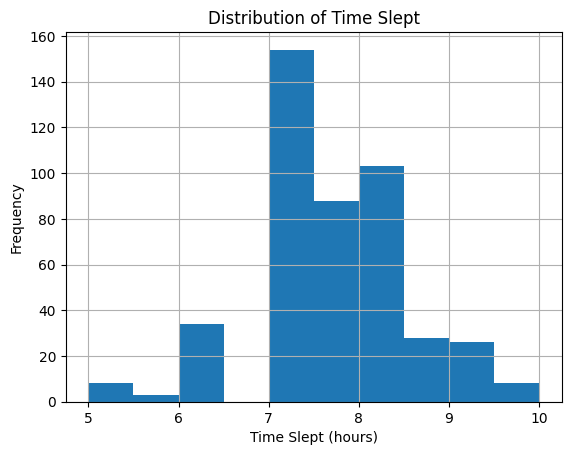

In [25]:
df['Bedtime'] = pd.to_datetime(df['Bedtime'])
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'])
df['time_slept'] = (df['Wakeup time'] - df['Bedtime']).dt.seconds / 3600
print(df['time_slept'].describe())
df['time_slept'].hist(bins=10)
plt.title('Distribution of Time Slept')
plt.xlabel('Time Slept (hours)')
plt.ylabel('Frequency')
plt.show()


# **Sleep Efficiency vs. Exercise Frequency**

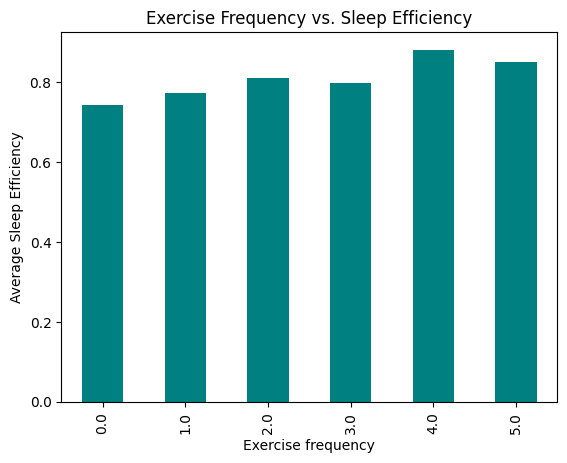

In [26]:
exercise_efficiency = df.groupby('Exercise frequency')['Sleep efficiency'].mean()
exercise_efficiency.plot(kind='bar', color='teal')
plt.title('Exercise Frequency vs. Sleep Efficiency')
plt.ylabel('Average Sleep Efficiency')
plt.show()


# **Smoking's Impact on Awakenings**

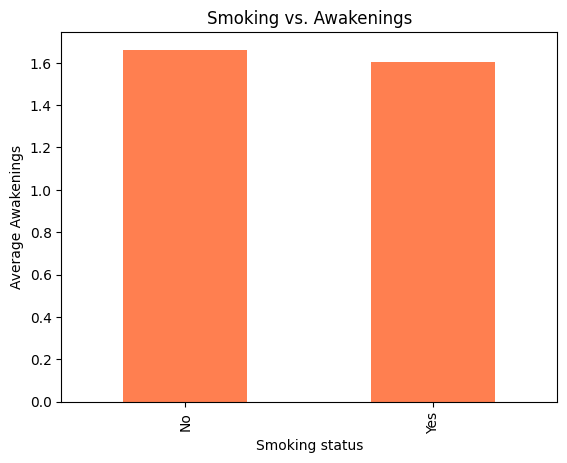

In [27]:
smoking_awakenings = df.groupby('Smoking status')['Awakenings'].mean()
smoking_awakenings.plot(kind='bar', color='coral')
plt.title('Smoking vs. Awakenings')
plt.ylabel('Average Awakenings')
plt.show()


# **Clustering of Sleep Efficiency Levels**

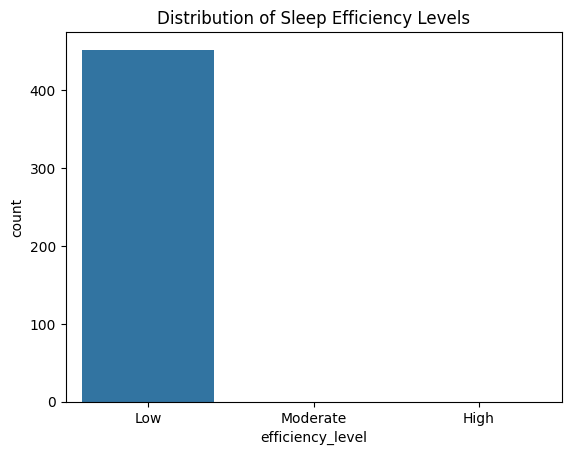

In [28]:
bins = [0, 50, 75, 100]
labels = ['Low', 'Moderate', 'High']
df['efficiency_level'] = pd.cut(df['Sleep efficiency'], bins=bins, labels=labels)
sns.countplot(data=df, x='efficiency_level')
plt.title('Distribution of Sleep Efficiency Levels')
plt.show()


# **Correlation Between Alcohol and Sleep Duration**

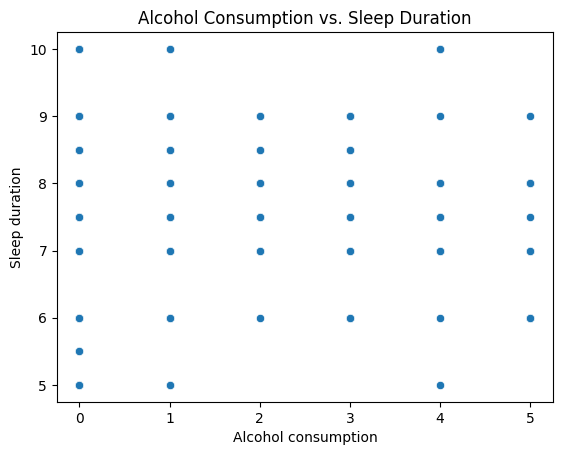

In [29]:
sns.scatterplot(data=df, x='Alcohol consumption', y='Sleep duration')
plt.title('Alcohol Consumption vs. Sleep Duration')
plt.show()


# **Feature Relationship Visualizations**

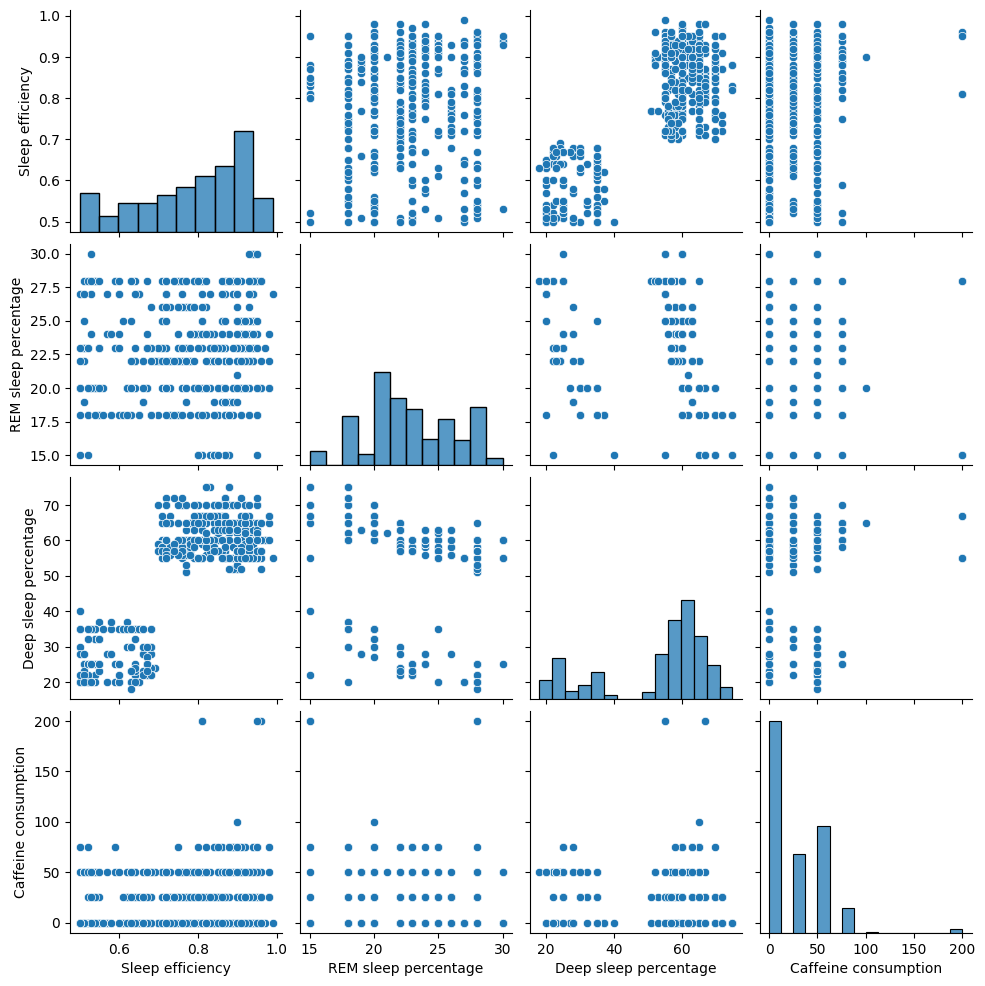

In [30]:
sns.pairplot(df[['Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Caffeine consumption']])
plt.show()


# **Missing Value Visualizations**

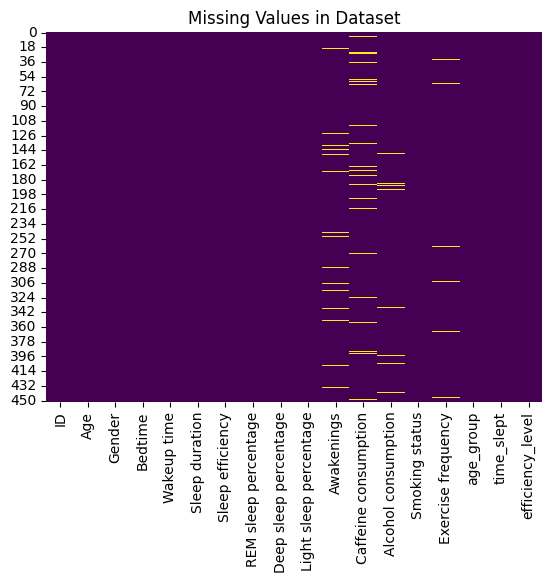

In [31]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()


>#  ***Data Preprocessing***

# **Handle missing values**

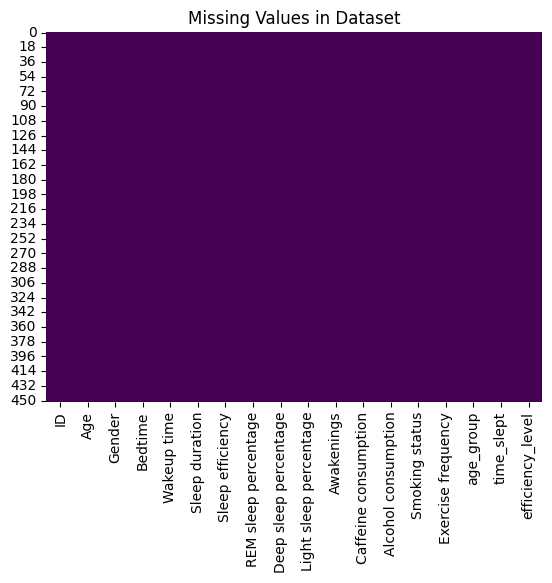

In [32]:
df['Awakenings'] = df['Awakenings'].fillna(df['Awakenings'].median())
df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].median())
df['Caffeine consumption'] = df['Caffeine consumption'].fillna('Unknown')
df['Alcohol consumption'] = df['Alcohol consumption'].fillna('Unknown')
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

# **Encode Categorical Variables**

In [33]:
df['Smoking status'].fillna(df['Smoking status'].mode()[0], inplace=True)
df['Smoking'] = df['Smoking status'].map({'Yes': 1, 'No': 0})
df_encoded = pd.get_dummies(df, columns=['Gender', 'Exercise frequency'], drop_first=True)
print(df_encoded.head())


   ID  Age             Bedtime         Wakeup time  Sleep duration  \
0   1   65 2021-03-06 01:00:00 2021-03-06 07:00:00             6.0   
1   2   69 2021-12-05 02:00:00 2021-12-05 09:00:00             7.0   
2   3   40 2021-05-25 21:30:00 2021-05-25 05:30:00             8.0   
3   4   40 2021-11-03 02:30:00 2021-11-03 08:30:00             6.0   
4   5   57 2021-03-13 01:00:00 2021-03-13 09:00:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    19                     28   
2              0.89                    20                     70   
3              0.51                    23                     25   
4              0.76                    27                     55   

   Light sleep percentage  Awakenings  ... age_group time_slept  \
0                      12         0.0  ...       60+        6.0   
1                      53         3.

C:\Users\Noor\AppData\Local\Temp\ipykernel_8868\3545777417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Smoking status'].fillna(df['Smoking status'].mode()[0], inplace=True)


# **Scale or Normalize Numerical Features**

In [34]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['Age', 'Sleep duration', 'REM sleep percentage', 
                     'Deep sleep percentage', 'Light sleep percentage', 
                     'Awakenings', 'Exercise frequency', 'time_slept']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


# **Split Dataset into Training and Testing Sets**

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(['ID', 'Sleep efficiency', 'efficiency_level'], axis=1)
y = df['Sleep efficiency'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


Training set shape: (361, 16), Testing set shape: (91, 16)


# **Feature Engineering**

In [36]:
df['Total Sleep Percentage'] = (
    df['REM sleep percentage'] +
    df['Deep sleep percentage'] +
    df['Light sleep percentage']
)
